In [ ]:
!pip install spacy
!pip install scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.3 MB 5.2 MB/s 
     |████████████████████████████████| 24.1 MB 2.1 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=6b11704aa919f0aa1f58349dd8d511ec6753f3416f7b5dec2a03ad6bc9331508
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
!pip install https://gitlab.com/trungtv/vi_spacy/-/raw/master/vi_core_news_lg/dist/vi_core_news_lg-0.0.1.tar.gz
!pip install pyvi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 254.5 MB 30 kB/s 
     |████████████████████████████████| 5.8 MB 3.2 MB/s 
  Created wheel for vi-core-news-lg: filename=vi_core_news_lg-0.0.1-py3-none-any.whl size=254513618 sha256=2e9bffc871662684736ade81d06fdf7f97b40b3b054950d044b9a5713ec19d32
  Stored in directory: /root/.cache/pip/wheels/e4/d9/90/dcbb25186a2c3335b17bc675f8dddcb43ecdfa4b400e8c91b0
Successfully built vi-core-news-lg
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: typer
    Found existing installation: typer 0.4.1
    Uninstalling typer-0.4.1:
      Successfully uninstalled typer-0.4.1
  Attempting uninstall: spacy
    Found existing installation: spacy 3.3.1
    Uninstalling spacy-3.3.1:
      Successfully unin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.5 MB 2.0 MB/s 
     |████████████████████████████████| 965 kB 66.7 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd '/gdrive/MyDrive/Bank_app/'

/gdrive/MyDrive/Bank_app


In [ ]:
import pandas as pd
import spacy
import scattertext as st
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
eng = pd.read_csv('processed_en.txt')
eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2696 entries, 0 to 2695
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Bank          2696 non-null   object
 1   review_text   2696 non-null   object
 2   review_score  2696 non-null   int64 
 3   english       2696 non-null   int64 
 4   target        2696 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 105.4+ KB


In [ ]:
eng.head()

,Bank,review_text,review_score,english,target
0,HDBank,stupid bank app without help on how to generat...,1,1,0
1,HDBank,high fees and money sometimes just disappear f...,1,1,0
2,HDBank,unable to login by password and unable to logi...,4,1,1
3,HDBank,whenever i choose transfer money option the ap...,3,1,0
4,HDBank,i can not run this app recently it crashes all...,3,1,0


In [ ]:
eng['label'] = eng.review_score.apply(lambda x: 'dislike' if x < 4 else 'like')

In [ ]:
eng.head()

,Bank,review_text,review_score,english,target,label
0,HDBank,stupid bank app without help on how to generat...,1,1,0,dislike
1,HDBank,high fees and money sometimes just disappear f...,1,1,0,dislike
2,HDBank,unable to login by password and unable to logi...,4,1,1,like
3,HDBank,whenever i choose transfer money option the ap...,3,1,0,dislike
4,HDBank,i can not run this app recently it crashes all...,3,1,0,dislike


In [ ]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.7 MB 5.2 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.3.0
    Uninstalling en-core-web-sm-3.3.0:
      Successfully uninstalled en-core-web-sm-3.3.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
corpus = st.CorpusFromPandas(eng, category_col = 'label',
                             text_col = 'review_text',
                             nlp = nlp).build()

In [ ]:
sent = st.produce_scattertext_explorer(corpus,
                                       category = 'dislike',
                                       category_name = 'Dislike',
                                       not_categories = ['like'],
                                       not_category_name = 'Like',
                                       width_in_pixels = 1000,
                                       metadata = eng['review_text'])

In [ ]:
open('Bank_app_Sentiment_eng.html', 'wb').write(sent.encode('utf-8'))

1003681

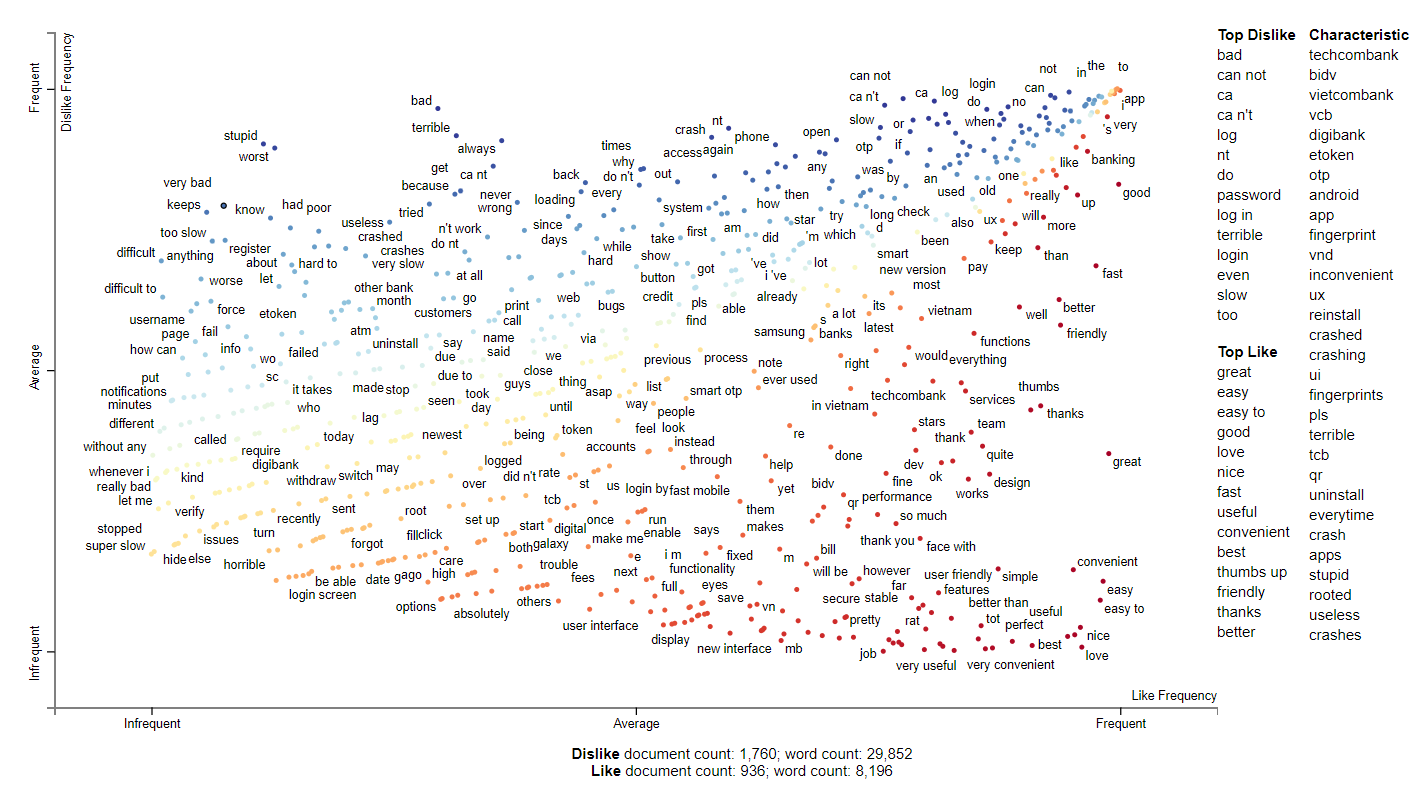

In [ ]:
vnm = pd.read_csv('processed_data.csv')
vnm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14829 entries, 0 to 14828
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bank            14829 non-null  object 
 1   review_text     14829 non-null  object 
 2   review_score    14829 non-null  float64
 3   english         14829 non-null  float64
 4   target          14829 non-null  float64
 5   review_text_wt  14829 non-null  object 
dtypes: float64(3), object(3)
memory usage: 695.2+ KB


In [ ]:
vnm.head()

,Bank,review_text,review_score,english,target,review_text_wt
0,HDBank,so far so good,5.0,0.0,1.0,so far so good
1,HDBank,quá tệ liên tục bị lỗi kết nối tới server bị g...,1.0,0.0,0.0,quá tệ liên_tục bị lỗi kết_nối tới server bị g...
2,HDBank,app của một ngân hàng có tham vọng mà để xảy r...,1.0,0.0,0.0,app của một ngân_hàng có tham_vọng mà để xảy r...
3,HDBank,app ngân hàng thuộc top cùi nhất thị trg mỗi l...,1.0,0.0,0.0,app ngân_hàng thuộc top cùi nhất thị trg mỗi l...
4,HDBank,mình dùng app để thanh toán vé máy bay và vé x...,5.0,0.0,1.0,mình dùng app để thanh_toán vé máy_bay và vé x...


In [ ]:
len(vnm.Bank.unique())

29

In [ ]:
vnm['label'] = vnm.review_score.apply(lambda x: 'dislike' if x < 4 else 'like')

In [ ]:
vnm.head()

,Bank,review_text,review_score,english,target,review_text_wt,label
0,HDBank,so far so good,5.0,0.0,1.0,so far so good,like
1,HDBank,quá tệ liên tục bị lỗi kết nối tới server bị g...,1.0,0.0,0.0,quá tệ liên_tục bị lỗi kết_nối tới server bị g...,dislike
2,HDBank,app của một ngân hàng có tham vọng mà để xảy r...,1.0,0.0,0.0,app của một ngân_hàng có tham_vọng mà để xảy r...,dislike
3,HDBank,app ngân hàng thuộc top cùi nhất thị trg mỗi l...,1.0,0.0,0.0,app ngân_hàng thuộc top cùi nhất thị trg mỗi l...,dislike
4,HDBank,mình dùng app để thanh toán vé máy bay và vé x...,5.0,0.0,1.0,mình dùng app để thanh_toán vé máy_bay và vé x...,like


In [ ]:
nlp_vnm = spacy.load('vi_core_news_lg')

In [ ]:
corpus_vnm = st.CorpusFromPandas(vnm, category_col = 'label',
                              text_col = 'review_text_wt',
                              nlp = nlp_vnm).build()

In [ ]:
sent_vnm = st.produce_scattertext_explorer(corpus_vnm,
                                       category = 'dislike',
                                       category_name = 'Dislike',
                                       not_categories = ['like'],
                                       not_category_name = 'Like',
                                       width_in_pixels = 1000,
                                       metadata = vnm['review_text'])

In [ ]:
open('Bank_app_Sentiment_vnm.html', 'wb').write(sent_vnm.encode('utf-8'))

6726144

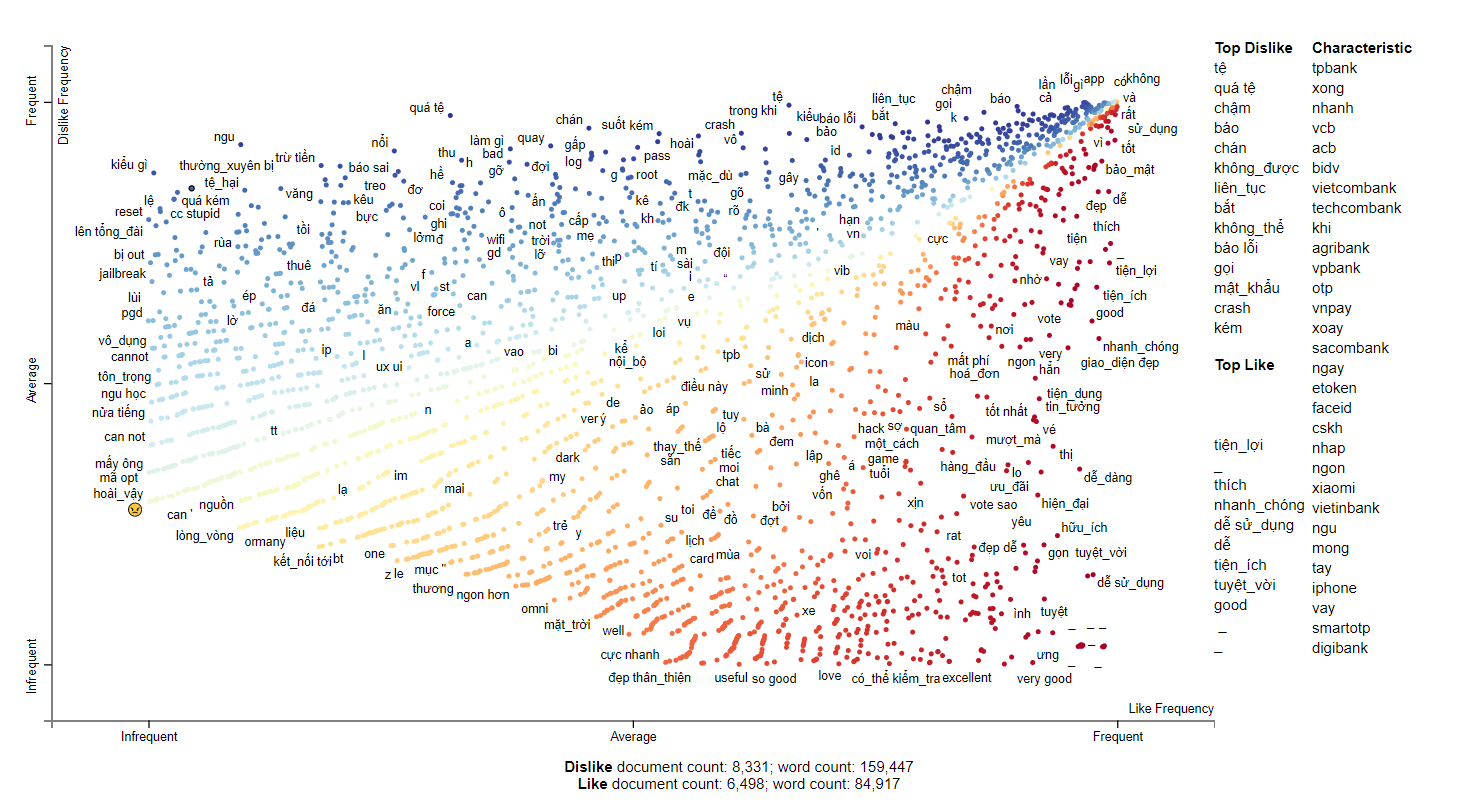